MAC 5768 - Visão e Processamento de Imagens

Segundo Semestre - 2020

Equipe:

    Ciro B Rosa - ciro.rosa@alumni.usp.br
    Josilton Sousa - josilton.sousa@gmail.com

Projeto de elaboração de tarefas do curso de Visão e Processamento de Imagens.


Fase 1, Parte 2 - Entrega em 5/10/2020

O código a seguir lê o arquivo de metadados da base de dados originalDataaset, extrai e apresenta um exemplar representativo de cada foto tirada de objeto em formato "mnist-like".

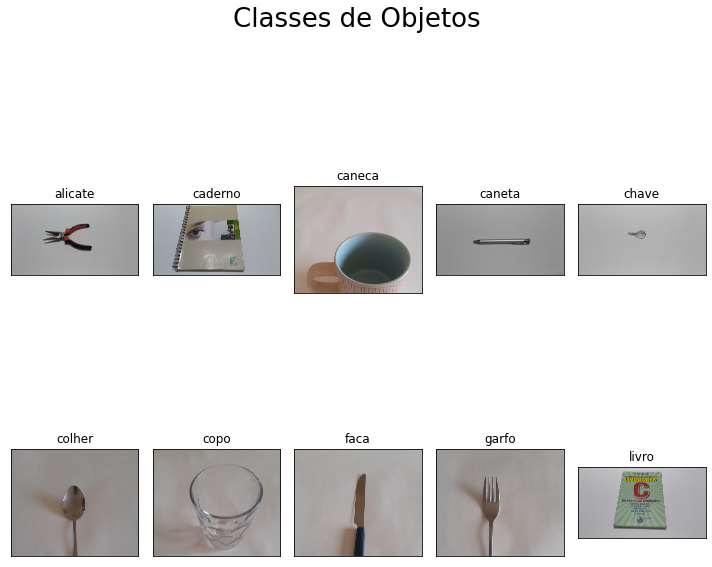

In [1]:
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt

# adequação do nome de arquivo nos metadados
def fix_jpeg_name(arq):
    arq2 = int(arq[:-4])
    arq2 = str(arq2) + ".jpg"
    return arq2


# ler arquivo de metadados aumentados
pasta = "./originalDataset/"
metafile = "grade.csv"
filename = pasta + metafile
df = pd.read_csv(filename, sep=";")

# dimensões das fotos
s = [(3096, 4128, 3), (2608, 4640, 3)]

# lista de classes
classes = ["garfo", "faca", "colher", "copo", "caneca", "alicate", "chave", "caneta", "livro", "caderno"]

# filtrar um objeto representativo por classe
seq = 1
tipo = "a"
fundo = "branco"
ilum = "indoor dia"

df = df[(df.sequencia == seq) &
        (df.tipo_obj == tipo) &
        (df.fundo == fundo) &
        (df.iluminacao == ilum)]

df = df.sort_values(by=["tipo_obj", "objeto"])
classes.sort()

fotos = []
for ind in df.index:
    arq = df["arquivo"][ind]
    arq = fix_jpeg_name(arq)
    f = pasta + arq
 
    # ler foto
    img = io.imread(f)
    fotos.append(img)

# plotagem de fotos "mnist-like"
plt.close("all")
f, ax = plt.subplots(2, 5, figsize=(10, 10), sharey=(True))
f.suptitle('Classes de Objetos', fontsize=26)

for i in range(5):
    ax[0, i].set_title(classes[i])
    ax[0, i].set(xticks=[], yticks=[])
    ax[0, i].imshow(fotos[i])
for i in range(5, 10):
    ax[1, i-5].set_title(classes[i])
    ax[1, i-5].set(xticks=[], yticks=[])
    ax[1, i-5].imshow(fotos[i])
plt.tight_layout()
io.show()
